In [145]:
# Import all applicable python libraries, and then begin data cleaning

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:
df = pd.read_csv('/Users/yuchenzhang/Desktop/MBAN 6110/Assignment 1/sales_data (1).csv')

In [148]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_1,72.87,10.0,2022-01-01
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,NaN,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
...,...,...,...,...,...
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17
1048,Product_27,Region_7,1.96,8.0,2024-03-10


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


<Axes: xlabel='Units Sold', ylabel='Count'>

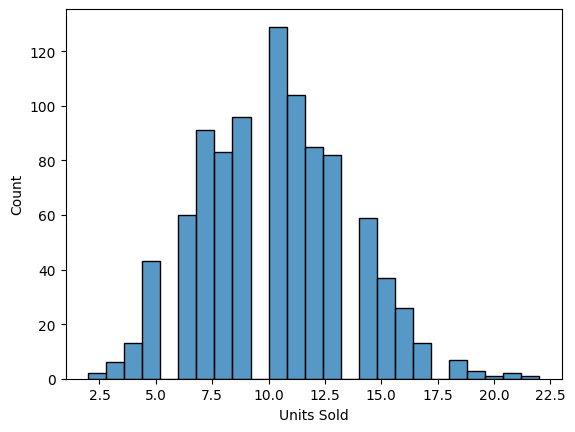

In [150]:
# Check for outlier for Units sold by histplot
sns.histplot(df['Units Sold'])   # looks like normal distrbution, the outliers is not likely to influence the  main data

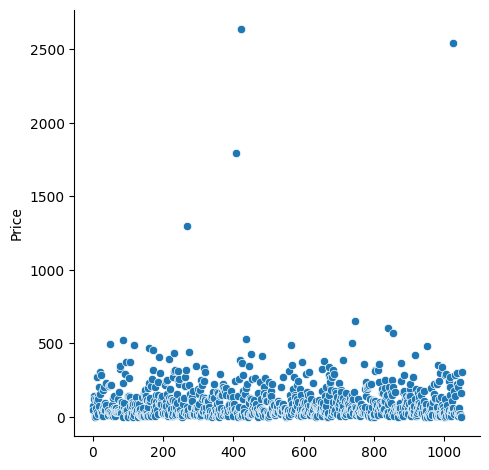

In [151]:
sns.relplot(df['Price'])  # find price outliers 

In [152]:
df[df['Price'] >= 1000]

,Product,Region,Price,Units Sold,Sale Date
269,Product_49,Region_8,1296.0,14.0,2022-09-27
407,Product_27,Region_7,1793.9,9.0,2023-02-12
421,Product_34,Region_2,2636.9,14.0,2023-02-26
1026,NaN,Region_5,2544.6,15.0,2023-02-22


In [153]:
# drop the outlier
df.drop([269, 407, 421], axis=0, inplace=True )

In [154]:
# Data Cleaing
# Step 1

In [155]:
df['Price'] = df['Price'].fillna(df.groupby('Product')['Price'].transform('median'))


In [156]:
df['Units Sold'] = df['Units Sold'].fillna(df.groupby('Product')['Units Sold'].transform('median'))

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     944 non-null    object 
 1   Region      939 non-null    object 
 2   Price       1036 non-null   float64
 3   Units Sold  1037 non-null   float64
 4   Sale Date   1047 non-null   object 
dtypes: float64(2), object(3)
memory usage: 49.1+ KB


In [158]:
# Step 2
# Drop missing value

In [159]:
df.dropna(subset=['Product', 'Region', 'Price', 'Units Sold'],inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 1 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     848 non-null    object 
 1   Region      848 non-null    object 
 2   Price       848 non-null    float64
 3   Units Sold  848 non-null    float64
 4   Sale Date   848 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.8+ KB


In [161]:
df

,Product,Region,Price,Units Sold,Sale Date
1,Product_40,Region_2,46.19,10.0,2022-01-02
2,Product_1,Region_5,75.88,4.0,2022-01-03
3,Product_6,Region_8,143.47,8.0,2022-01-04
4,Product_44,Region_4,122.54,10.0,2022-01-05
5,Product_21,Region_8,15.76,20.0,2022-01-06
...,...,...,...,...,...
1044,Product_39,Region_6,239.07,10.0,2023-05-18
1045,Product_42,Region_3,18.63,9.0,2023-07-10
1046,Product_4,Region_3,159.27,10.0,2024-07-14
1047,Product_43,Region_1,2.91,13.0,2023-08-17


In [162]:
# Step 3
# Total Analysis

In [163]:
product_sales = df['Units Sold'] * df['Price']
total_sales = product_sales.groupby(df['Product']).sum()
Region_sales = product_sales.groupby(df['Region']).sum()

In [164]:
Pop_sale = df.groupby('Product')['Units Sold'].sum()

In [165]:
Region_pop_sale = df.groupby('Region')['Units Sold'].sum()

The top five most popular product!

In [166]:
Pop_sale.sort_values(ascending=False).head()

Product
Product_24    289.0
Product_4     264.0
Product_8     263.5
Product_40    243.0
Product_43    233.0
Name: Units Sold, dtype: float64

Text(0.5, 1.0, 'The top five most popular product')

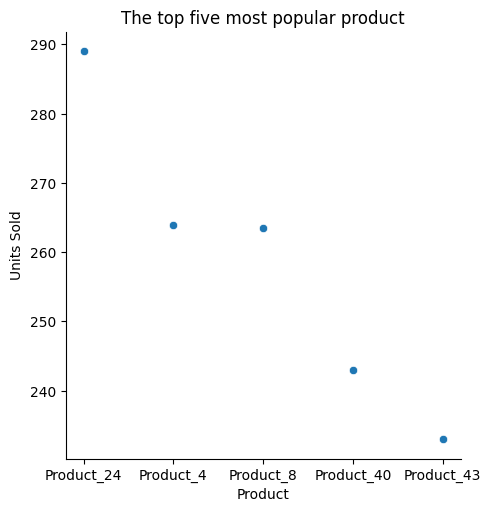

In [167]:
sns.relplot(Pop_sale.sort_values(ascending=False).head())
plt.title('The top five most popular product')

The top five most profitable products ！

In [168]:
total_sales.sort_values(ascending=False).head()  # The top five most profitable products

Product
Product_50    33208.100
Product_23    29406.950
Product_19    27817.605
Product_40    24515.020
Product_7     23897.300
dtype: float64

Text(0.5, 1.0, 'The top five products sells most money')

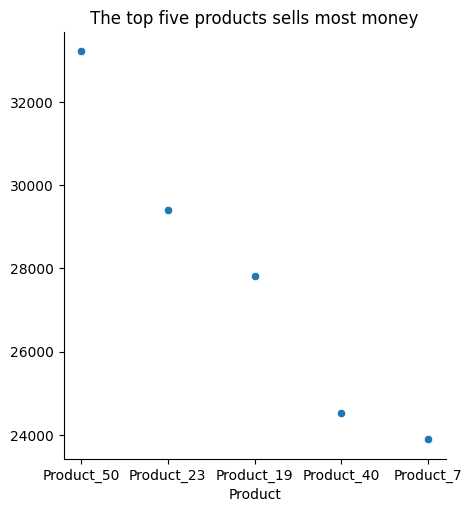

In [169]:
sns.relplot(total_sales.sort_values(ascending=False).head())
plt.title('The top five products sells most money')

The region that sold for the most money ！


In [170]:
Region_sales.sort_values(ascending=False).head()  # The region that sold for the most money

Region
Region_5     98142.63
Region_2     95480.84
Region_10    92168.98
Region_8     86592.43
Region_6     85535.70
dtype: float64

Text(0.5, 1.0, 'The region that sold for the most money')

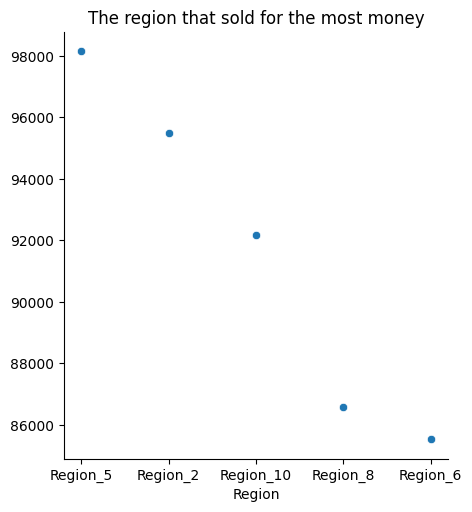

In [171]:
sns.relplot(Region_sales.sort_values(ascending=False).head())
plt.title('The region that sold for the most money')

The region that sold for the most product ！

In [172]:
Region_pop_sale.sort_values(ascending=False).head()  # The region that sold for the most product

Region
Region_5    983.5
Region_7    938.5
Region_2    904.5
Region_9    887.0
Region_8    878.0
Name: Units Sold, dtype: float64

Text(0.5, 1.0, 'The region that sold for the most product')

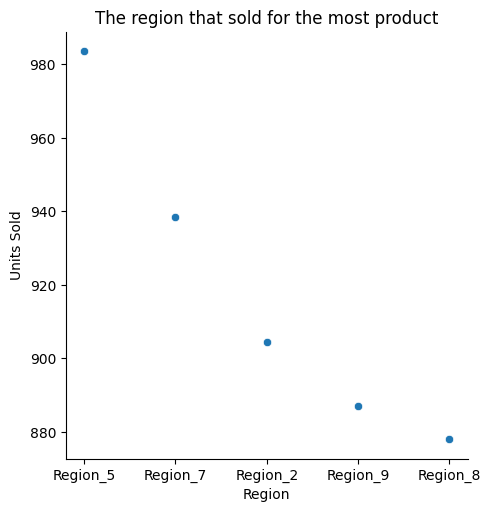

In [173]:
sns.relplot(Region_pop_sale.sort_values(ascending=False).head())
plt.title('The region that sold for the most product')

In [174]:
# Step 4
# Year analysis

In [175]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])

In [176]:
df['Year'] = df['Sale Date'].dt.year

In [177]:
data_by_year = {}
for year, data in df.groupby('Year'):
    data_by_year[year] = data

In [178]:
Year_sales = product_sales.groupby(df['Year']).sum()

Year Rank

In [179]:
Year_sales.sort_index(ascending=True).head() 

Year
2022    301306.425
2023    291571.065
2024    234480.690
dtype: float64

/var/folders/1s/1ydr33r9161b79pnkp2c_0fm0000gn/T/ipykernel_12954/684373006.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  Ye.set_xticklabels(Ye.get_xticklabels(), rotation=45)


Text(0.5, 1.0, 'Year Profit')

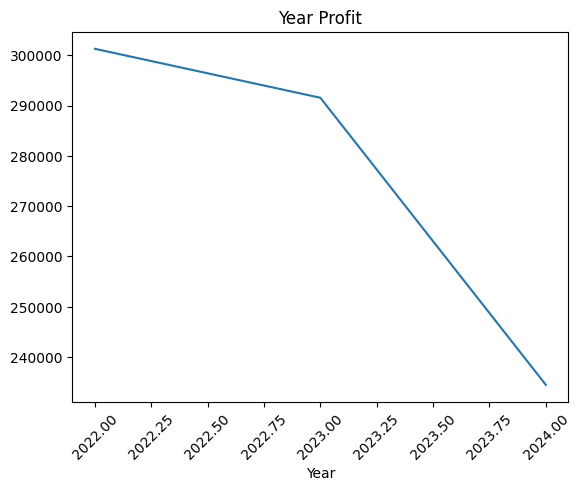

In [180]:
Ye = sns.lineplot(Year_sales.sort_index(ascending=True).head())
Ye.set_xticklabels(Ye.get_xticklabels(), rotation=45)
plt.title('Year Profit')

There is 3.34% decreases in sales during 2022 ~  2023 

There is 24.35% decreases in sales during 2023 ~  2024, We have to find the reason why!


In [181]:
(Year_sales.iloc[1] - Year_sales.iloc[0]) / Year_sales.iloc[1] * 100 

-3.338932139922727

In [182]:
(Year_sales.iloc[2] - Year_sales.iloc[1]) / Year_sales.iloc[2] * 100 

-24.347580604611835

In [183]:
index_22 = df['Year'] == 2022
index_23 = df['Year'] == 2023
index_24 = df['Year'] == 2024

In [184]:
Year_Pop_sale_22 = df[index_22].groupby(['Product'])['Units Sold'].sum()
Year_Pop_sale_23 = df[index_23].groupby(['Product'])['Units Sold'].sum()
Year_Pop_sale_24 = df[index_24].groupby(['Product'])['Units Sold'].sum()

In [185]:
Year_R_sale_22 = df[index_22].groupby(['Region'])['Units Sold'].sum()
Year_R_sale_23 = df[index_23].groupby(['Region'])['Units Sold'].sum()
Year_R_sale_24 = df[index_24].groupby(['Region'])['Units Sold'].sum()

In [186]:
pd.DataFrame(Year_Pop_sale_22)
pd.DataFrame(Year_Pop_sale_23)
pd.DataFrame(Year_Pop_sale_24)
P_22_23 = ((Year_Pop_sale_23 - Year_Pop_sale_22) / Year_Pop_sale_23)
P_23_24 = ((Year_Pop_sale_24 - Year_Pop_sale_23) / Year_Pop_sale_24)

In [187]:
positive_count_22_23 = len(P_22_23[P_22_23 > 0])   # The number of positive increases in product
positive_count_22_23
(positive_count_22_23 / len(P_22_23)) * 100   # 42% of sales in product are increases / 58% of decreased

42.0

In [188]:
positive_count_23_24 = len(P_23_24[P_23_24 > 0])
positive_count_23_24
(positive_count_23_24 / len(P_23_24)) * 100   # 30% of sales in product are increases / 70 % are decreased

30.0

2022 top 5 Region for product sell

In [189]:
Year_R_sale_22.sort_values(ascending=False).head() # 2022 top 5 Region for product sell

Region
Region_5    372.5
Region_8    365.0
Region_7    359.5
Region_9    339.0
Region_2    328.5
Name: Units Sold, dtype: float64

Text(0.5, 1.0, '2022 top 5 Region for product sell')

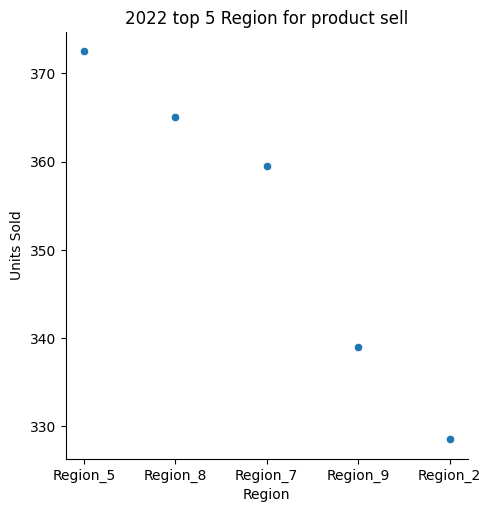

In [190]:
sns.relplot(Year_R_sale_22.sort_values(ascending=False).head())
plt.title('2022 top 5 Region for product sell')

2023 top 5 Region for product sell

In [191]:
Year_R_sale_23.sort_values(ascending=False).head() # 2023 top 5 Region for product sell

Region
Region_1     383.0
Region_10    368.0
Region_5     361.0
Region_9     353.5
Region_2     310.0
Name: Units Sold, dtype: float64

Text(0.5, 1.0, '2023 top 5 Region for product sell')

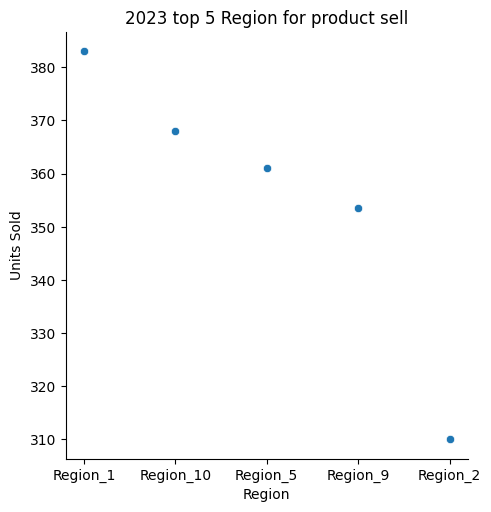

In [192]:
sns.relplot(Year_R_sale_23.sort_values(ascending=False).head())
plt.title('2023 top 5 Region for product sell')

2024 top 5 Region for product sell

In [193]:
Year_R_sale_24.sort_values(ascending=False).head() # 2024 top 5 Region for product sell

Region
Region_7    332.0
Region_6    311.0
Region_2    266.0
Region_5    250.0
Region_8    243.5
Name: Units Sold, dtype: float64

Text(0.5, 1.0, '2024 top 5 Region for product sell')

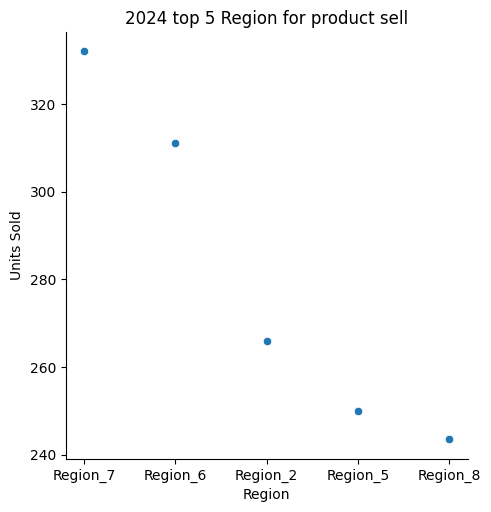

In [194]:
sns.relplot(Year_R_sale_24.sort_values(ascending=False).head())
plt.title('2024 top 5 Region for product sell')

In [195]:
pd.DataFrame(Year_R_sale_22)
pd.DataFrame(Year_R_sale_23)
pd.DataFrame(Year_R_sale_24)
Y_22_23_R8 = (Year_R_sale_23.loc['Region_8'] - Year_R_sale_22.loc['Region_8']) / Year_R_sale_23.loc['Region_8']

Y_23_24_R1 = (Year_R_sale_24.loc['Region_1'] - Year_R_sale_23.loc['Region_1']) / Year_R_sale_24.loc['Region_1']

In [196]:
Y_22_23_R8 * 100  #  Region 8 decreases the sales of product by 40.62% 2022-2023

-35.43599257884972

In [197]:
Y_23_24_R1 * 100   # Region 1 decreases the sales of product by 121.39% during 2023-2024

-121.38728323699422

In [198]:
Y_22_23 = ((Year_R_sale_23 - Year_R_sale_22) / Year_R_sale_23)
Y_23_24 = ((Year_R_sale_24 - Year_R_sale_23) / Year_R_sale_24)

In [199]:
pd.DataFrame(Y_22_23).sort_values(by='Units Sold', ascending=False).head(10)


,Units Sold
Region,
Region_10,0.354620
Region_1,0.271540
Region_4,0.068852
Region_9,0.041018
Region_6,0.002045
Region_5,-0.031856
Region_2,-0.059677
Region_3,-0.145985
Region_8,-0.354360


In [200]:
Y_count_22_23 = len(Y_22_23[Y_22_23 > 0])   # The number of positive increases in region
Y_count_22_23
(Y_count_22_23 / len(Y_22_23)) * 100   # 50% of sales product in region are increases / 50 % are decreased

50.0

In [201]:
pd.DataFrame(Y_23_24).sort_values(by='Units Sold', ascending=False).head(10)

,Units Sold
Region,
Region_7,0.256024
Region_6,0.213826
Region_8,-0.106776
Region_2,-0.165414
Region_3,-0.286385
Region_4,-0.367713
Region_5,-0.444000
Region_10,-0.624724
Region_9,-0.817481


In [202]:
Y_count_23_24 = len(Y_23_24[Y_23_24 > 0])   # The number of positive increases in region
Y_count_23_24
(Y_count_23_24 / len(Y_23_24)) * 100   # 20% of sales product in region are increases / 80 % are decreased

20.0

 Top 5 product in 2022

In [203]:
Year_Pop_sale_22.sort_values(ascending=False).head()  # Top 5 product in 2022

Product
Product_15    135.0
Product_8     116.0
Product_4     116.0
Product_44    104.0
Product_17    100.0
Name: Units Sold, dtype: float64

Text(0.5, 1.0, 'Top 5 product in 2022')

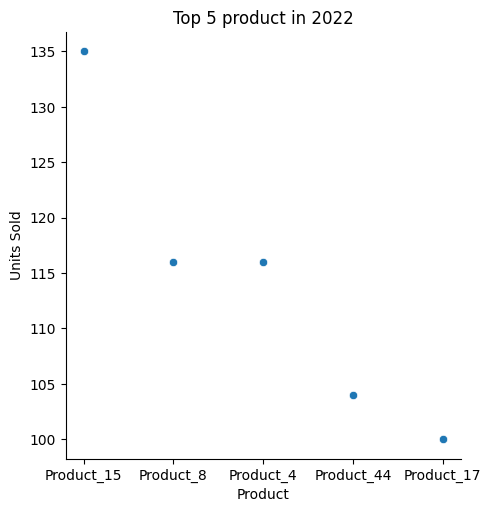

In [204]:
sns.relplot(Year_Pop_sale_22.sort_values(ascending=False).head() )
plt.title('Top 5 product in 2022')

 Top 5 product in 2023

In [205]:
Year_Pop_sale_23.sort_values(ascending=False).head()  # Top 5 product in 2023

Product
Product_24    163.0
Product_43    143.0
Product_10    120.0
Product_4     119.0
Product_23    114.0
Name: Units Sold, dtype: float64

Text(0.5, 1.0, 'Top 5 product in 2023')

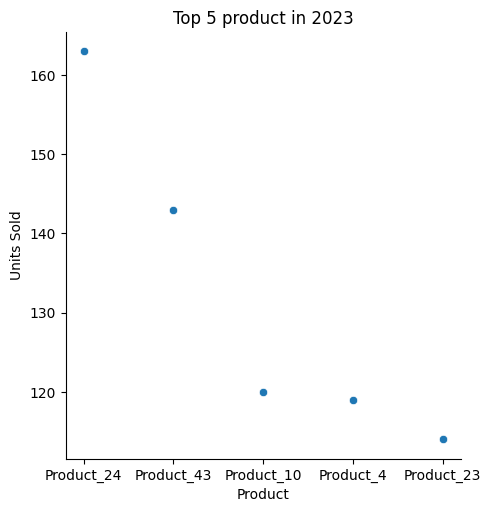

In [206]:
sns.relplot(Year_Pop_sale_23.sort_values(ascending=False).head() )
plt.title('Top 5 product in 2023')

 Top 5 product in 2024

In [207]:
Year_Pop_sale_24.sort_values(ascending=False).head()  # Top 5 product in 2024

Product
Product_19    119.0
Product_24     99.0
Product_8      88.0
Product_37     87.0
Product_43     76.0
Name: Units Sold, dtype: float64

Text(0.5, 1.0, 'Top 5 product in 2024')

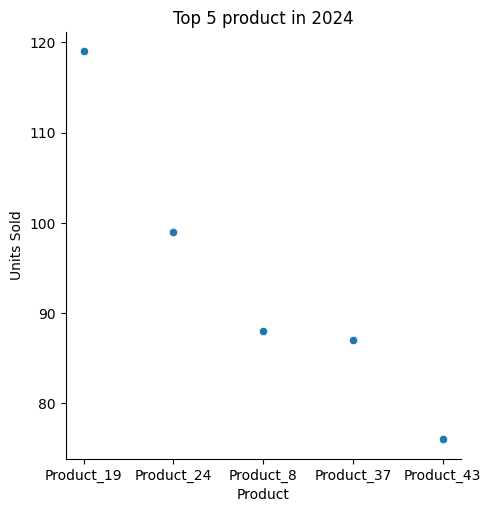

In [208]:
sns.relplot(Year_Pop_sale_24.sort_values(ascending=False).head() )
plt.title('Top 5 product in 2024')

The Product was popular in 22 & 23 become less popular in 24. Find out by what kind of reason? Enviroment, politics, tech...

<Axes: xlabel='Units Sold', ylabel='Count'>

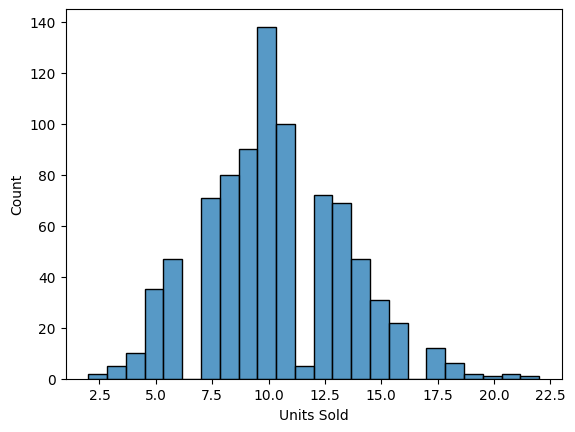

In [209]:
sns.histplot(df['Units Sold'])  # most of us item selled 10 each time

1. What conclusions can you draw about sales performance of various products and regions?

First, three years of data analysis. 24/4/8/40/43 are our top 5 best-selling products. But it's not in the top five sells most money. The Top 5 product sells for most money are the product 50/23/19/40/7. So the company needs to promote the those product vigorously.
Region 5/2/10/8/6 sells the most money, region 5/7/2/9/8 sells the most products, the company should focus on region 5/2/8, these regions sells more things, but also sells for most money.

Then there's the annual analysis,  Year 22-23 has decreased sales slighlty. However,in 23-24, the company seemed to have changed a lot,  with a 24.35% drop in sales. The company needs to find out whether internal management or external environmental factors  caused the problem, which is crucial. In 22-23, the sales volume of product increased by 42% and decreased by 58%, but it only drops in sells 3.34%. During 23-24, the sales of 30% products increased and 70% products decreased, but the sales decreased by 24.35%. A big reason might be that valuable goods are not selling, probably because of the economic environment.

Also，The company's sales in 24 years are largely due to external market changes, but also partly due to internal operational problems. According to the analysis of 22-23, the company does not focus on maintaining regions with high sales, such as Region 8 decreases the sales of product by 40.62%. During 2022-2023, Region 1 decreases the sales of product by 121.39% during 2023-2024. 

Generally speaking, I think 22 and 23 should be the normal sales figures of this company. The company should not have paid special attention to the regions and products that sold well, which may result in the products that sold well in 22 not selling well in 23. Region, for the same reason. However, there may have been a huge change in external factors in 2024, which led to the decrease of a large number of product sales.


2. What recommendations do you have for the business?

Our analysis suggests that the external environment is extremely volatile in 2024. The company should focus on stability at this time, so I suggest eliminating most of the products with poor sales and focusing on the top ten sales.

Therefore, companies need to adjust their strategies, modify product lines, or eliminate less significant products or regions in order to reduce the risk of unstable years. Simultaneously, companies should prioritize products or regions that sell well and allocate more resources to them, ensuring that these advantages are not wasted.

3. Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?


I used a histplot to determine that the units sold data follows a normal distribution, and there were very few outliers, so I decided to ignore them. However, when I used a scatterplot for the price, I noticed several outliers. I chose to delete those outliers. Then, I proceeded with data cleaning by filling in the missing values for units sold and price using the median. I decided to delete the products and regions with missing data.

To determine the median, I used the groupby method based on the product because I believe it provides a more accurate representation of the data's accuracy. Calculating the median based on product and region using price or units sold could potentially introduce inaccuracies, so I chose to omit those calculations.